## Creating A Dataframe

In [1]:
import pandas as pd
import numpy as np




## Load the Titanic dataset

In [2]:
df = pd.read_csv('titanic.csv')

## Display the first few rows of the dataset

In [3]:
print("First few rows of the dataset:")
print(df.head())
print(df.shape)

First few rows of the dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            3734

## Identify missing values

In [4]:
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


# HANDLING MISSING VALUES

## Method 1: Drop rows with missing values

In [5]:
df_dropped = df.dropna()
print("\n METHOD 1 Shape of dataset after dropping rows with missing values:", df_dropped.shape)


 METHOD 1 Shape of dataset after dropping rows with missing values: (183, 12)


## Method 2: Fill missing values with a specific value (e.g., 0)

In [6]:
df_filled_zeros = df.fillna(0)
print("\nMETHOD 2 Missing values filled with 0:")
print(df_filled_zeros.isnull().sum())


METHOD 2 Missing values filled with 0:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


##  Method 3: Fill missing values with the mean (for numerical columns)

In [7]:
# df['Age'].fillna(df['Age'].mean(), inplace=True) (Original command, no longer works.)
df.fillna({'Age':df['Age'].mean()}, inplace=True)

print("\nMETHOD 3 Missing values in 'Age' column after filling with mean:")
print(df['Age'].isnull().sum())


METHOD 3 Missing values in 'Age' column after filling with mean:
0


## Method 4: Fill missing values with the most frequent value (mode)

In [8]:
# df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True) (Original command, no longer works)
df.fillna({'Embarked': df['Embarked'].mode()[0]}, inplace = True)
print("\nMETHOD 4 Missing values in 'Embarked' column after filling with mode:")
print(df['Embarked'].isnull().sum())


METHOD 4 Missing values in 'Embarked' column after filling with mode:
0


## Method 5: Forward fill method

In [9]:
df_ffill = df.ffill()
print("\nMethod 5 Missing values handled using forward fill method:")
print(df_ffill.isnull().sum())


Method 5 Missing values handled using forward fill method:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          1
Embarked       0
dtype: int64


## Method 6: Backward fill method

In [10]:
df_bfill = df.bfill()
print("\nMethod 6 Missing values handled using backward fill method:")
print(df_bfill.isnull().sum())
print("*****************")


Method 6 Missing values handled using backward fill method:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          1
Embarked       0
dtype: int64
*****************


# NORMALIZATION

### NORMALISING A ASET OF VALUES USING MIN MAX NORMALIZATION

In [2]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

#### Example usage:

In [3]:
data = np.array([2, 5, 8, 11, 14]).reshape(-1, 1)  # Reshape to 2D array for scaler

### Initialize the MinMaxScaler

In [4]:
scaler = MinMaxScaler()

### Apply Min-Max normalization

In [5]:
normalized_data = scaler.fit_transform(data)

In [7]:

# Flatten the normalized data to 1D array
normalized_data = normalized_data.flatten()

print(normalized_data)

[0.   0.25 0.5  0.75 1.  ]


### NORMALISING A SET OF VALUES USING Z-SCORE NORMALIZATION

In [8]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Example usage:
data = np.array([2, 5, 8, 11, 14]).reshape(-1, 1)  # Reshape to 2D array for scaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply Z-score normalization
normalized_data = scaler.fit_transform(data)

# Flatten the normalized data to 1D array
normalized_data = normalized_data.flatten()

print(normalized_data)


[-1.41421356 -0.70710678  0.          0.70710678  1.41421356]


In [10]:
### NORMALIZING CERTAIN COLUMNS IN THE DATAFRAME

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# List of columns to be normalized
columns_to_normalize = ['Age', 'Fare']

# Apply Min-Max normalization
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

print("\nDataFrame after Min-Max normalization:")
print(df)

NameError: name 'df' is not defined

In [18]:
#####SAMPLING

In [19]:
###RANDOM SAMPLING
import random

# Sample data
population = list(range(1, 101))  # Population from 1 to 100
sample_size = 10  # Size of the sample

# Simple random sampling
sample = random.sample(population, sample_size)
print("Simple Random Sample:", sample)


Simple Random Sample: [10, 79, 85, 8, 84, 16, 32, 66, 73, 33]


In [11]:
###STRATIFIED SAMPLING

import random

# Sample data with strata
strata_data = {
    'stratum1': [1, 2, 3, 4, 5],
    'stratum2': [6, 7, 8, 9, 10],
}

# Sample size per stratum
sample_size_per_stratum = 2

# Stratified sampling
sample = []
for stratum, data in strata_data.items():
    stratum_sample = random.sample(data, sample_size_per_stratum)
    sample.extend(stratum_sample)

print("Stratified Sample:", sample)


Stratified Sample: [4, 1, 9, 8]


In [12]:
# Sample data
data = list(range(1, 101))  # Data from 1 to 100
n = 5  # Every nth data point to be included in the sample

# Systematic sampling
sample = data[::n]
print("Systematic Sample:", sample)


Systematic Sample: [1, 6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96]


In [22]:
import random

# Sample data with clusters
clusters = {
    'cluster1': [1, 2, 3],
    'cluster2': [4, 5, 6],
    'cluster3': [7, 8, 9],
}

# Number of clusters to sample
clusters_to_sample = 2

# Cluster sampling
selected_clusters = random.sample(list(clusters.keys()), clusters_to_sample)
print("chosen clusters ", selected_clusters)
sample = []
for cluster in selected_clusters:
    sample.extend(clusters[cluster])

print("Cluster Sample:", sample)


chosen clusters  ['cluster3', 'cluster1']
Cluster Sample: [7, 8, 9, 1, 2, 3]


In [23]:
####BINNING

In [2]:
import pandas as pd

In [3]:
import pandas as pd
df = pd.read_csv('bollywood.csv')
# Assuming 'df' is your DataFrame containing the dataset
budget_bins = [0, 10, 20, float('inf')]  # Define your budget bins
budget_labels = ['Low Budget', 'Medium Budget', 'High Budget']  # Labels for the bins

df['BudgetBin'] = pd.cut(df['Budget'], bins=budget_bins, labels=budget_labels)


In [4]:
df.head(10)

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,BudgetBin
0,1,18-Apr-14,2 States,LW,Romance,36,104.00,8576361,26622,2527,High Budget
1,2,04-Jan-13,Table No. 21,N,Thriller,10,12.00,1087320,1129,137,Low Budget
2,3,18-Jul-14,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54,Low Budget
3,4,04-Jan-13,Rajdhani Express,N,Drama,7,0.35,42626,86,19,Low Budget
4,5,04-Jul-14,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224,Medium Budget
5,6,30-May-14,Citylights,HS,Drama,7,35.00,1076591,1806,84,Low Budget
6,7,19-Sep-14,Daawat-E-Ishq,N,Comedy,30,24.60,3905050,8315,1373,High Budget
7,8,11-Jan-13,Matru Ki Bijlee Ka Mandola,N,Comedy,33,40.00,2435283,4326,647,High Budget
8,9,10-Jan-14,Dedh Ishqiya,LW,Comedy,31,27.00,2333067,2436,591,High Budget
9,10,11-Jan-13,Gangoobai,N,Drama,2,0.01,4354,1,1,Low Budget


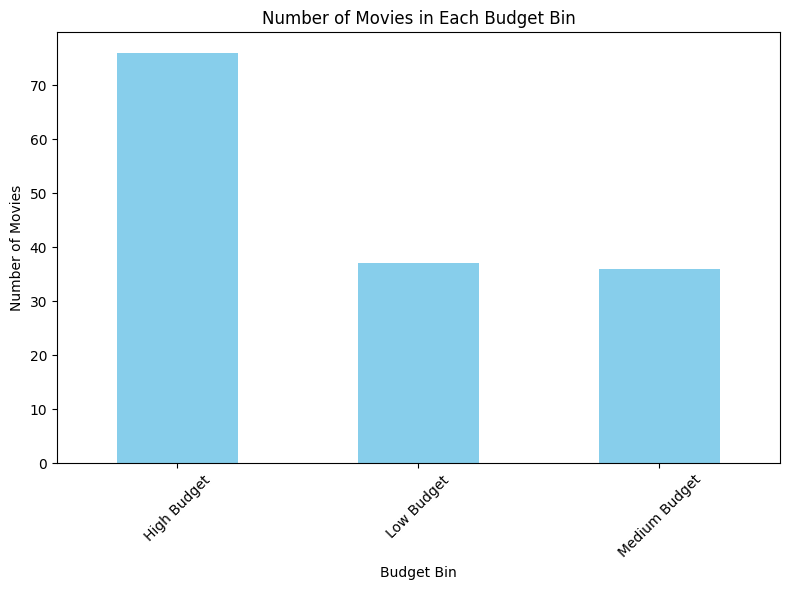

In [5]:

import matplotlib.pyplot as plt
budget_bin_counts = df['BudgetBin'].value_counts()

# Plot the data as a bar chart
plt.figure(figsize=(8, 6))
budget_bin_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Movies in Each Budget Bin')
plt.xlabel('Budget Bin')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


In [ ]:
collection_bins = [0, 20, 40, 60, float('inf')]  # Define your collection bins
collection_labels = ['Low Collection', 'Medium Collection', 'High Collection', 'Very High Collection']  # Labels for the bins

df['CollectionBin'] = pd.cut(df['BoxOfficeCollection'], bins=collection_bins, labels=collection_labels)
df.head(10)


In [ ]:

import matplotlib.pyplot as plt
budget_bin_counts = df['CollectionBin'].value_counts()

# Plot the data as a bar chart
plt.figure(figsize=(8, 6))
budget_bin_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Movies in Each Budget Bin')
plt.xlabel('Budget Bin')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()